In [3]:
import torch
import json
import h5py
import random
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

ModuleNotFoundError: No module named 'h5py'

In [ ]:
# load the following to files from DETECTED_SGG_DIR
custom_prediction = json.load(open('../dataset/VLEP/objects/training/custom_prediction.json'))
custom_data_info = json.load(open('../dataset/VLEP/objects/custom_data_info.json'))

In [ ]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def print_list(name, input_list, scores=None):
    for i, item in enumerate(input_list):
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))
    
def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None):
    size = get_size(Image.open(img_path).size)
    print(size)
    pic = Image.open(img_path).resize(size)
    num_obj = len(boxes)
    for i in range(num_obj):
        info = str(i) + '_' + box_labels[i]
        draw_single_box(pic, boxes[i], draw_info=info)
    display(pic)
    print('*' * 50)
    print_list('box_labels', box_labels, box_scores)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores)
    
    return None

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

In [ ]:
# parameters
image_idx = '../dataset/VLEP/images/validation/house_s06e04_seg02_clip_07_ep_00239.jpg'
box_topk = 30 # select top k bounding boxes
ind_to_classes = custom_data_info['ind_to_classes']

(999, 562)


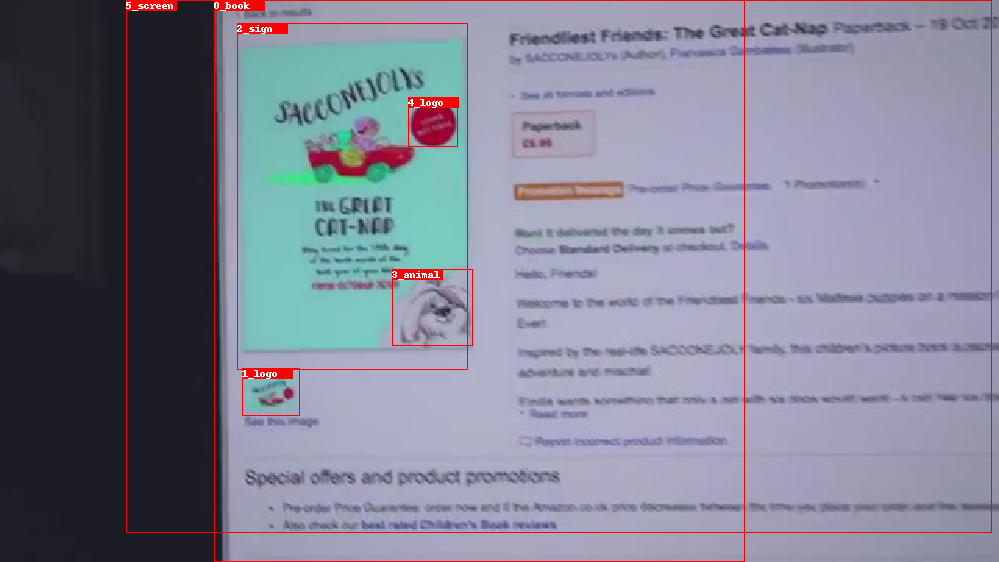

**************************************************
box_labels 0: book; score: 0.7044749855995178
box_labels 1: logo; score: 0.6322259902954102
box_labels 2: sign; score: 0.4458441734313965
box_labels 3: animal; score: 0.38583242893218994
box_labels 4: logo; score: 0.38420727849006653
box_labels 5: screen; score: 0.3100948929786682
**************************************************


In [ ]:
image_path = image_idx
boxes = custom_prediction[str(image_idx)]['bbox'][:box_topk]
box_labels = custom_prediction[str(image_idx)]['bbox_labels'][:box_topk]
box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]

for i in range(len(box_labels)):
    box_labels[i] = ind_to_classes[box_labels[i]]

rel_labels = []
rel_scores = []

draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

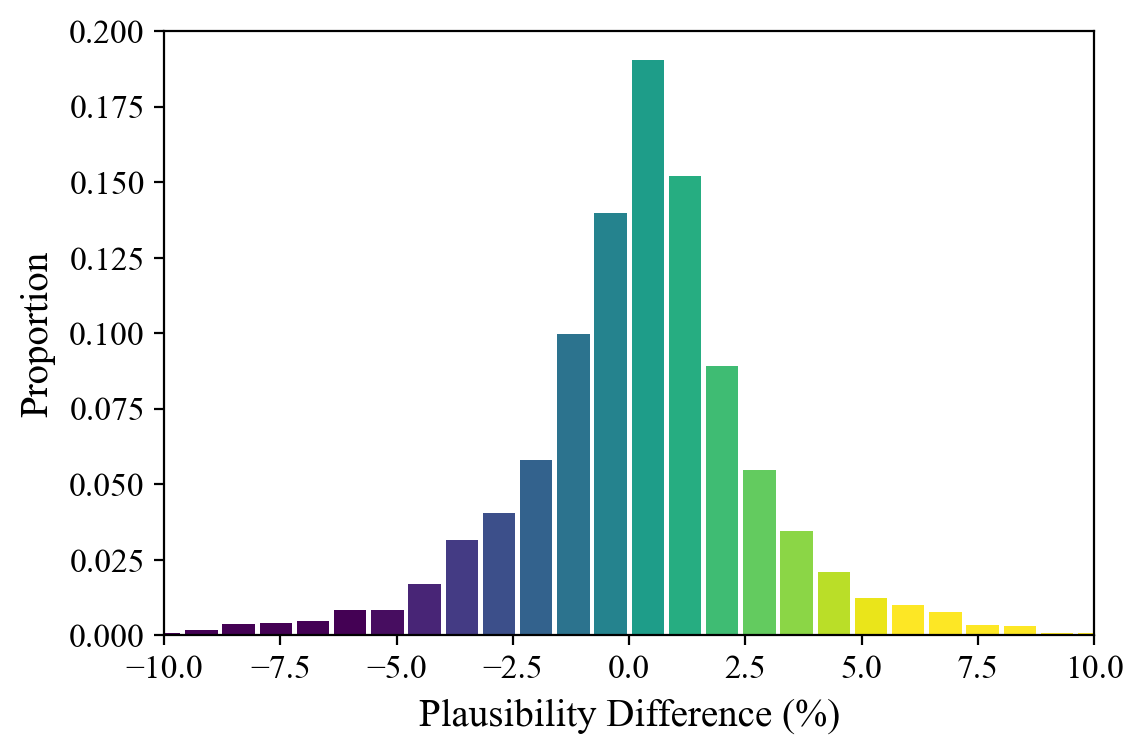

In [7]:
plt.figure(dpi=200, figsize=(6,4))
plt.rcParams['font.sans-serif'] = ['Arial']
score = np.load('./diff_0.2.npy')
# score = np.array([0,-0.05,0.05])
import math
x = np.arange(-12,12,0.8)
y = np.zeros(30)
for i in score:
    idx = math.floor((i - (-0.12)) / 0.008)
    if idx>=30:
        continue
    y[idx] += 1
y /= score.size

plt.yticks(fontproperties = 'Times New Roman', size = 12)
plt.xticks(fontproperties = 'Times New Roman', size = 12)
plt.xlim(-10, 10)  # 设置x轴的范围
# # plt.ylim(1.5, 16)

plt.xlabel("Plausibility Difference (%)", fontdict={'family' : 'Times New Roman', 'size'   : 14}, labelpad=5)
plt.ylabel("Proportion", fontdict={'family' : 'Times New Roman', 'size'   : 14}, labelpad=5)

# plt.hist(score * 100, bins=np.arange(-10,10,0.8), density=True,  histtype='bar', rwidth=0.8, color=['moccasin'])
import matplotlib
from matplotlib import cm
map_vir = cm.get_cmap('viridis', len(x))
color = map_vir(np.linspace(-0.5, 1.5, len(x)))
plt.bar(x+0.4, y, color=color, width=0.7)

plt.savefig("diff.svg", format="svg")
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


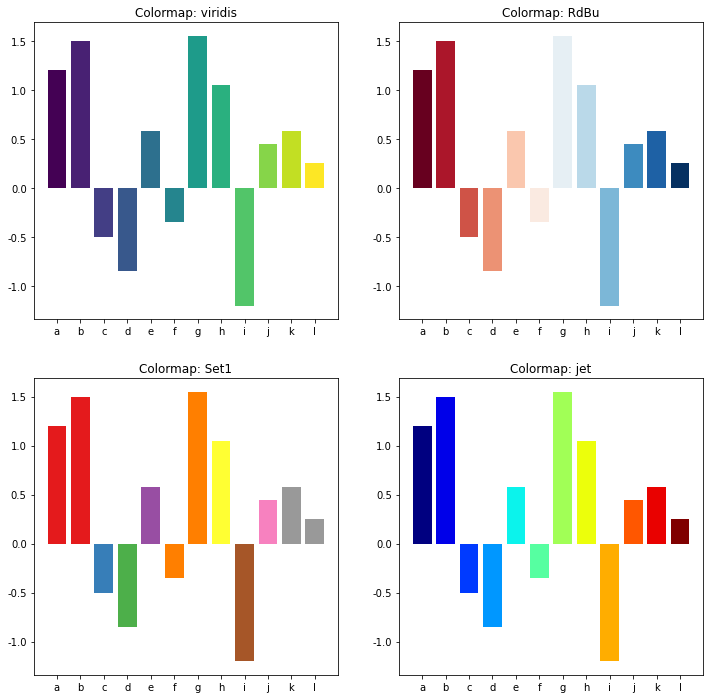

In [91]:
x = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "k", "l"]
y = [1.2, 1.5, -0.5, -0.85, 0.58, -0.35, 1.55, 1.05, -1.2, 0.45, 0.58, 0.25]

# 尝试四种不同的调色板，分别生成颜色列表
cmap_names = ["viridis", "RdBu", "Set1", "jet"]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
ax = ax.flatten()

for i, name in enumerate(cmap_names):
    # 创建colormap对象，颜色列表长度和柱子的数量相同
    cmap = matplotlib.cm.get_cmap(name, len(x))
    # 从调色板中获取颜色列表
    colors = cmap(np.linspace(0, 1, len(x)))
    # 每根柱子赋予不同的颜色
    ax[i].bar(x, y, color=colors)
    ax[i].set_title(f"Colormap: {name}")